In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE,ADASYN
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve,roc_auc_score, auc
from sklearn.metrics import accuracy_score , precision_score , recall_score ,  make_scorer,f1_score , precision_recall_curve , roc_auc_score 
from imblearn.combine import SMOTETomek
from sklearn.model_selection import GridSearchCV

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
data = pd.read_csv('creditcard.csv')

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
X = data.drop(columns=['Class'])
y = data[['Class']]

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.80,stratify=y,random_state=42)

In [10]:
smote_tomek = SMOTETomek(sampling_strategy=0.1,random_state=42)
X_sm_tomek, y_sm_tomek = smote_tomek.fit_resample(X_train, y_train)

In [11]:
y_sm_tomek.value_counts(),y_train.value_counts()

(Class
 0        225589
 1         21647
 Name: count, dtype: int64,
 Class
 0        226602
 1           378
 Name: count, dtype: int64)

In [12]:
xgb_model = XGBClassifier(scale_pos_weight=14, random_state=42)
xgb_model.fit(X_sm_tomek, y_sm_tomek)
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)
print("XGB results : \n")
print(f"accuracy_score is : {accuracy_score(y_test, y_pred)} ")
print(f"precision_score is : {precision_score(y_test, y_pred)}")
print(f"recall_score is : {recall_score(y_test, y_pred)}")
print(f"f1_score is : {f1_score(y_test, y_pred)}")

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba[:,1])

print("best threshold for max f1_score : \n")

f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

best_threshold = thresholds[f1_scores.argmax()]
print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

print("best threshold for max recall : \n")
min_precision = .9
valid_idx = np.where(precisions[:-1] >= min_precision)[0]
best_threshold = thresholds[valid_idx][recalls[valid_idx].argmax()]

print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

XGB results : 

accuracy_score is : 0.9994537059880872 
precision_score is : 0.8636363636363636
recall_score is : 0.8
f1_score is : 0.8306010928961749
best threshold for max f1_score : 

best Threshold: 0.9573521
Precision (custom threshold): 0.9620253164556962
Recall (custom threshold): 0.8
F1-score (custom threshold): 0.8735632183908046
best threshold for max recall : 

best Threshold: 0.7340847
Precision (custom threshold): 0.9047619047619048
Recall (custom threshold): 0.8
F1-score (custom threshold): 0.8491620111731844


In [13]:
'''
XGB results : 

accuracy_score is : 0.9994537059880872 
precision_score is : 0.8636363636363636
recall_score is : 0.8
f1_score is : 0.8306010928961749
best threshold for max f1_score : 

best Threshold: 0.9573521
Precision (custom threshold): 0.9620253164556962
Recall (custom threshold): 0.8
F1-score (custom threshold): 0.8735632183908046
best threshold for max recall : 

best Threshold: 0.7340847
Precision (custom threshold): 0.9047619047619048
Recall (custom threshold): 0.8
F1-score (custom threshold): 0.8491620111731844
'''

'\nXGB results : \n\naccuracy_score is : 0.9994537059880872 \nprecision_score is : 0.8636363636363636\nrecall_score is : 0.8\nf1_score is : 0.8306010928961749\nbest threshold for max f1_score : \n\nbest Threshold: 0.9573521\nPrecision (custom threshold): 0.9620253164556962\nRecall (custom threshold): 0.8\nF1-score (custom threshold): 0.8735632183908046\nbest threshold for max recall : \n\nbest Threshold: 0.7340847\nPrecision (custom threshold): 0.9047619047619048\nRecall (custom threshold): 0.8\nF1-score (custom threshold): 0.8491620111731844\n'

ROC AUC SCORE :  0.9652502069457594


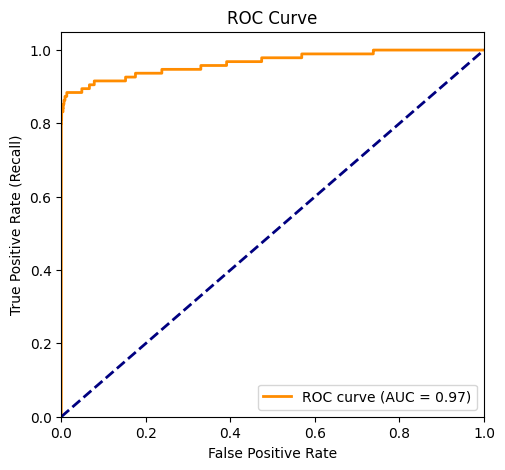

In [14]:
# ---------------- ROC Curve ----------------
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
print("ROC AUC SCORE : ",roc_auc)

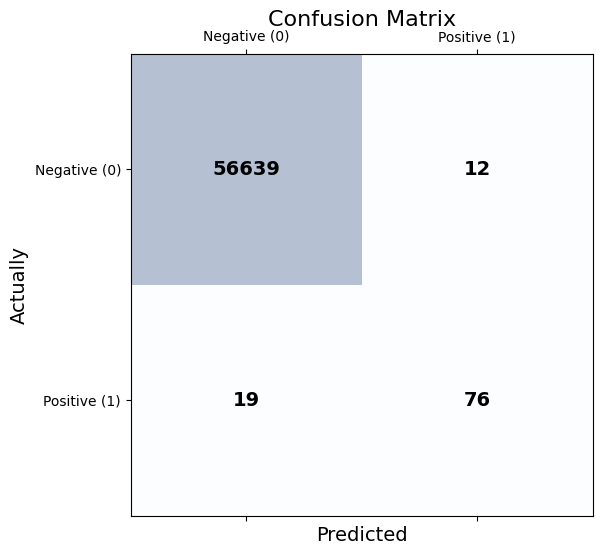

[[56639    12]
 [   19    76]]


In [15]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(6,6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center', fontsize=14, fontweight='bold')

plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actually', fontsize=14)

ax.set_xticks([0,1])
ax.set_yticks([0,1])

ax.set_xticklabels(['Negative (0)', 'Positive (1)'])
ax.set_yticklabels(['Negative (0)', 'Positive (1)'])

plt.title("Confusion Matrix", fontsize=16, pad=20)

plt.show()
print(cm)